# 1.Import Data

In [80]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt

In [81]:
data = pd.read_csv('Data/Raw/data_all.csv')
data= data.rename(columns = {'wspd':'prev_wspd','nxt_wspd':'wspd'})
data

,prev_displ,prev_vell,prev_accl,prev_wspd,displ,vell,accl,wspd,act,dispm,velm,accm,dispm_0,velm_0,accm_0
0,24,24,26,3,13,24,27,3,10.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
1,24,24,26,3,13,23,27,3,20.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
2,24,24,26,3,13,23,27,3,30.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
3,24,24,26,3,13,23,26,3,40.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
4,24,24,26,3,13,23,26,3,50.0,0.000107,0.000146,0.000336,0.000108,0.000142,0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35755,13,24,26,1,32,23,26,1,160.0,0.000101,0.000160,0.001413,0.000165,0.000392,0.001427
35756,13,24,26,1,32,23,26,1,170.0,0.000101,0.000165,0.001413,0.000165,0.000392,0.001427
35757,13,24,26,1,32,23,26,1,180.0,0.000101,0.000171,0.001413,0.000165,0.000392,0.001427
35758,13,24,26,1,32,23,26,1,190.0,0.000101,0.000176,0.001413,0.000165,0.000392,0.001427


In [82]:
#reward function = Ucondi/Uuncondi if 
for j in ['disp','vel','acc']:
    data['r_'+j] = np.abs(data[j+'m']/data[j+'m_0'])
    # if no change reward = 0
    data.loc[data['r_'+j]==1,'r_'+j] = 0# - data['act']/2000
    data.loc[data['r_'+j]>1,'r_'+j] = -data.loc[data['r_'+j]>1,'r_'+j]# - data['act']/2000
    data.loc[(data['r_'+j]<1)&(data['r_'+j]>0),'r_'+j] = 1/data.loc[data['r_'+j]<1,'r_'+j]# - data['act']/2000
    
    

In [83]:
for j in ['disp','vel','acc']:
    data['r_'+j] = (data[j+'m_0'] - data[j+'m'])*10**5 - data['act']/100 
        

# 2. Create Subset data

## 2.1 Check Data summary for rewards

In [84]:
for j in ['disp','vel','acc']:
    print(data['r_'+j].mean())
    print(data['r_'+j].median())
    print()

1.9861481693853702
1.7444002923700004

13.77030082392363
12.373002252550002

0.8882814207742162
-0.19982717156998395



# 2.2 Separate the Data for models

In [86]:
for j in ['disp','vel','acc']:
    col_names = ['prev_'+j+'l', 'prev_wspd', j+'l', 'wspd', 'act', 'r_'+j]
    globals()[j] = round(data[col_names],6)
    eval(j)['state'] = list(zip(   eval(j)['prev_wspd'],np.abs(eval(j)['prev_'+j+'l'])))
    eval(j)['state_p'] = list(zip(   eval(j)['wspd'],np.abs(eval(j)[j+'l'])))
    globals()[j] = eval(j)[['state', 'state_p', 'act', 'r_'+j]].drop_duplicates()
    eval(j).to_csv('Data/{}.csv'.format(j))
# we have three datasets: disp, vel, acc, with s, s', a r
disp

,state,state_p,act,r_disp
0,"(3, 24)","(3, 13)",10.0,0.009993
1,"(3, 24)","(3, 13)",20.0,-0.090009
2,"(3, 24)","(3, 13)",30.0,-0.190011
3,"(3, 24)","(3, 13)",40.0,-0.290013
4,"(3, 24)","(3, 13)",50.0,-0.390015
...,...,...,...,...
35755,"(1, 13)","(1, 32)",160.0,4.783912
35756,"(1, 13)","(1, 32)",170.0,4.692478
35757,"(1, 13)","(1, 32)",180.0,4.607811
35758,"(1, 13)","(1, 32)",190.0,4.528017


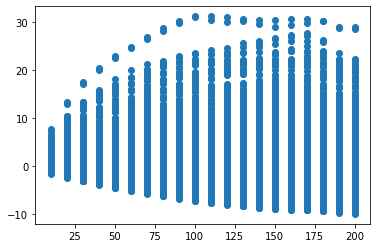

In [87]:
plt.scatter(eval('disp')['act'],eval('disp')['r_disp'])

(array([2.500e+01, 1.060e+02, 1.510e+02, 3.390e+02, 3.500e+02, 4.200e+02,
        5.940e+02, 7.010e+02, 9.020e+02, 1.322e+03, 2.138e+03, 2.908e+03,
        3.349e+03, 3.458e+03, 3.189e+03, 2.951e+03, 2.629e+03, 2.464e+03,
        2.183e+03, 1.492e+03, 8.720e+02, 5.800e+02, 3.470e+02, 1.980e+02,
        1.450e+02, 1.280e+02, 1.200e+02, 1.040e+02, 6.600e+01, 7.000e+01,
        6.200e+01, 4.400e+01, 5.200e+01, 2.300e+01, 3.300e+01, 3.300e+01,
        2.400e+01, 3.300e+01, 3.400e+01, 1.800e+01, 1.300e+01, 1.000e+01,
        8.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 7.000e+00,
        9.000e+00, 8.000e+00]),
 array([-9.91152100e+00, -9.08759080e+00, -8.26366060e+00, -7.43973040e+00,
        -6.61580020e+00, -5.79187000e+00, -4.96793980e+00, -4.14400960e+00,
        -3.32007940e+00, -2.49614920e+00, -1.67221900e+00, -8.48288800e-01,
        -2.43586000e-02,  7.99571600e-01,  1.62350180e+00,  2.44743200e+00,
         3.27136220e+00,  4.09529240e+00,  4.91922260e+00,  5.74315280e+

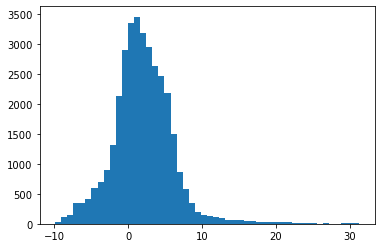

In [88]:
plt.hist(eval('disp')['r_disp'],bins=50)

In [89]:
#check the total states vs observed next states
for j in [disp,vel,acc]:
    print('total samples:',len(j))
    print('total unique current state:', len(set(j['state'])))
    print('total unique next state:',len(set(j['state_p'])))
    print()

total samples: 34728
total unique current state: 282
total unique next state: 373

total samples: 35138
total unique current state: 200
total unique next state: 276

total samples: 31583
total unique current state: 180
total unique next state: 286



In [90]:
for i in data.columns:
    print(i,':',len(set(data[i])))
# 20 actions
# 395 displacement
# 675 velocity
# 1026 acceleration

prev_displ : 44
prev_vell : 36
prev_accl : 35
prev_wspd : 10
displ : 50
vell : 46
accl : 45
wspd : 10
act : 20
dispm : 33182
velm : 34287
accm : 14555
dispm_0 : 1783
velm_0 : 1786
accm_0 : 1786
r_disp : 35032
r_vel : 35593
r_acc : 29265


## 2.3 Unique Value of (parameter, wind_speed)

In [91]:
for i in ['displ','vell','accl']:
    temp = set(pd.concat([data['prev_'+i],data[i]], axis=0,ignore_index=True))
    print(len(temp))
    temp2 = set(pd.concat([data['prev_wspd'],data['wspd']], axis=0,ignore_index=True))
    print(len(temp2))
    globals()['unique_{}'.format(i)] = [(j,k) for j in range(1,11) for k in range(1,51)]
len(unique_displ),len(unique_vell),len(unique_accl)
unique_displ

50
10
46
10
45
10


[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (2, 29),
 (2, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (2, 34),
 (2, 35),
 (2, 36),
 (2, 37),
 (2, 38),
 (2, 39),
 (2, 40),
 (2, 41),
 (2, 42),
 (2, 43),
 (2, 44),
 (2, 45),
 (2, 46),
 (2, 47),
 (2, 48),
 (2, 49),
 (2, 50),
 (3, 1),
 (3, 2),


# 4. Dictionarized all (disp/vel/acc, wind) to s1,s2...

In [92]:
#create dictionary for each state
for i in ['unique_displ','unique_vell','unique_accl']:
  my_list = eval(i)
  globals()['dict_'+i] = dict() 
  for index,value in enumerate(my_list):
    eval('dict_'+i)[index+1] = value
#dict_unique_prev_displ
len(dict_unique_displ.keys())
dict_unique_displ

{1: (1, 1),
 2: (1, 2),
 3: (1, 3),
 4: (1, 4),
 5: (1, 5),
 6: (1, 6),
 7: (1, 7),
 8: (1, 8),
 9: (1, 9),
 10: (1, 10),
 11: (1, 11),
 12: (1, 12),
 13: (1, 13),
 14: (1, 14),
 15: (1, 15),
 16: (1, 16),
 17: (1, 17),
 18: (1, 18),
 19: (1, 19),
 20: (1, 20),
 21: (1, 21),
 22: (1, 22),
 23: (1, 23),
 24: (1, 24),
 25: (1, 25),
 26: (1, 26),
 27: (1, 27),
 28: (1, 28),
 29: (1, 29),
 30: (1, 30),
 31: (1, 31),
 32: (1, 32),
 33: (1, 33),
 34: (1, 34),
 35: (1, 35),
 36: (1, 36),
 37: (1, 37),
 38: (1, 38),
 39: (1, 39),
 40: (1, 40),
 41: (1, 41),
 42: (1, 42),
 43: (1, 43),
 44: (1, 44),
 45: (1, 45),
 46: (1, 46),
 47: (1, 47),
 48: (1, 48),
 49: (1, 49),
 50: (1, 50),
 51: (2, 1),
 52: (2, 2),
 53: (2, 3),
 54: (2, 4),
 55: (2, 5),
 56: (2, 6),
 57: (2, 7),
 58: (2, 8),
 59: (2, 9),
 60: (2, 10),
 61: (2, 11),
 62: (2, 12),
 63: (2, 13),
 64: (2, 14),
 65: (2, 15),
 66: (2, 16),
 67: (2, 17),
 68: (2, 18),
 69: (2, 19),
 70: (2, 20),
 71: (2, 21),
 72: (2, 22),
 73: (2, 23),
 74: 

## 4.1 Conver the tuple states into a dictionarized states 

In [93]:
for i in ['disp','vel','acc']:
    print(i)
    index = 0
    temp = eval(i)
    dic_i = eval('dict_unique_'+i+'l')
    key_list = list(dic_i.keys())
    val_list = list(dic_i.values())

    temp['s'] = 0
    temp['s_p'] = 0

    for z in range(len(temp)):
        j = temp['state'].iloc[z]
        k = temp['state_p'].iloc[z]
        position_s = val_list.index(j)
        position_s_p = val_list.index(k)
        temp['s'].iloc[index] = key_list[position_s]
        temp['s_p'].iloc[index] = key_list[position_s_p]
        index +=1
    temp['a'] = temp['act']/10
    temp['a']  = temp['a'].astype(int)
    globals()[i] = temp
#my_dict_unique_displ.get()

disp


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


vel
acc


In [94]:
disp

,state,state_p,act,r_disp,s,s_p,a
0,"(3, 24)","(3, 13)",10.0,0.009993,124,113,1
1,"(3, 24)","(3, 13)",20.0,-0.090009,124,113,2
2,"(3, 24)","(3, 13)",30.0,-0.190011,124,113,3
3,"(3, 24)","(3, 13)",40.0,-0.290013,124,113,4
4,"(3, 24)","(3, 13)",50.0,-0.390015,124,113,5
...,...,...,...,...,...,...,...
35755,"(1, 13)","(1, 32)",160.0,4.783912,13,32,16
35756,"(1, 13)","(1, 32)",170.0,4.692478,13,32,17
35757,"(1, 13)","(1, 32)",180.0,4.607811,13,32,18
35758,"(1, 13)","(1, 32)",190.0,4.528017,13,32,19


In [95]:
for i in ['disp','vel','acc']:
    globals()[i+'o'] = eval(i)[['s','a','r_'+i,'s_p']].rename(columns={ 'r_'+i: 'r','s_p' : 'sp'})

In [96]:
dispo

,s,a,r,sp
0,124,1,0.009993,113
1,124,2,-0.090009,113
2,124,3,-0.190011,113
3,124,4,-0.290013,113
4,124,5,-0.390015,113
...,...,...,...,...
35755,13,16,4.783912,32
35756,13,17,4.692478,32
35757,13,18,4.607811,32
35758,13,19,4.528017,32


In [97]:
for i in ['disp','vel','acc']:
    idx = eval(i+'o').groupby(['s'])['r'].transform(max) == eval(i+'o')['r']
    globals()[i+'_optimal'] = eval(i+'o')[idx]
    print(len(set(eval(i+'o')['s'])))
    globals()[i+'_act_count'] = eval(i+'_optimal')['a'].value_counts()
#641
#424
#338

282
200
180


In [103]:
pd.concat([disp_act_count,vel_act_count,acc_act_count],axis =1)

,a,a,a
1,10,1,66
2,10,7,23
3,15,11,21
4,24,6,8
5,40,11,11
6,34,17,8
7,23,6,8
8,14,15,3
9,8,21,7
10,5,8,1


# 4.2 Save the Data to Data file
* csv
* Dictionary

In [99]:
for i in ['disp','vel','acc']:
    eval(i+'o').to_csv('Data/Version_from_python/{}.csv'.format(i+'o'),index=False)

    dic_i = eval('dict_unique_'+i+'l')
    a_file = open("Data/Version_from_python/{}_dic.json".format(i), "w")
    json.dump(dic_i, a_file)
    a_file.close()

### Loading Test

In [79]:
for i in ['disp','vel','acc']:
    a_file = open("Data/Version_from_python/{}_dic.json".format(i), "r")
    output = a_file.read()
    globals()['{}_dic'.format(i)]=output
#dict_unique_displ

In [80]:
a_file = open("Data/Version_from_python/disp_dic.json", "r")
a_dictionary = json.load(a_file)

In [35]:
len(disp_dic)
disp_dic[1]

'"'

In [36]:
# ratio =  max(DO) / max(NOTHING)
    # if ratio = 1 -> reward = 0 + penalty
    # if ratio > 1 -> reward = -ratio + penalty
    # if ratio < 1 -> reward = 1/ratio + penalty

# reward = max(NOTHING) / max(DO) - Voltage / constant 

In [100]:
policy_disp = pd.read_csv('Policy/dispo_policy.csv')
policy_disp.value_counts()

17
9     62
15    45
5     42
13    38
1     35
14    35
11    32
3     32
8     23
2     23
20    23
4     18
7     15
6     15
16    12
17    12
19    12
10    11
12     8
18     6
dtype: int64

In [104]:
policy_disp = pd.read_csv('Policy/dispo_policy_2.csv')
policy_disp.value_counts()

1 
1     225
15     26
5      23
4      22
8      22
7      20
3      16
6      16
10     16
16     15
2      14
9      12
17     12
11     11
20     11
13     10
18      8
14      7
12      7
19      6
dtype: int64